<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/26_4_FastAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В домашней работе вам необходимо с помощью FastAPI реализовать REST API:

На 5 баллов. Творческое задание. REST API можно использовать для взаимодействия с вашей моделью нейронной сети. Вы уже знаете, что можно обучить модель, а лучший результат выгрузить для дальнейшего использования. Для получения 5 баллов необходимо обучить свою модель, загрузить ее в Colab. Задача может быть любой: регрессии, классификации, входными данными могут быть картинки или текстовые данные. С помощью REST API обеспечьте взаимодействие с моделью. Это полностью творческое задание!

In [517]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import numpy as np
import pandas as pd

from keras import models
from keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow import keras

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [518]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras import utils
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras import regularizers
from sklearn import metrics

In [519]:
file_excel = '/content/drive/MyDrive/DS.xlsx'
data = pd.read_excel(file_excel)

In [520]:
data.head(3)

,Data,Val_plan,Val_fact,Tovar_plan,Tovar_fact,Tovar_nesvar,Tovar_svar,Transneft,Sborka_chel,Svarka_chel
0,2020-12-01,2050.32,1752.0,2064.79,2014.4,1062.9,951.4,0,506.9,568.9
1,2021-01-01,1930.73,1623.0,1914.79,1690.8,999.9,690.8,0,429.9,460.9
2,2021-02-01,1961.80,1683.8,1938.32,1787.9,1251.3,536.5,0,361.9,400.9


In [521]:
x_data = data[['Tovar_svar', 'Sborka_chel', 'Svarka_chel']]

In [522]:
y_data = data[['Tovar_fact']]

In [523]:
x_data = x_data.apply(lambda x: (x - x.mean()) / x.std() if x.std() != 0 else x, axis=0)

In [524]:
y_data = y_data.apply(lambda x: (x - x.mean()) / x.std() if x.std() != 0 else x, axis=0)

In [525]:
x_data.tail(3)

,Tovar_svar,Sborka_chel,Svarka_chel
84,-2.238790,-0.258679,-0.680505
85,-0.950453,0.917787,0.484715
86,-0.969713,0.710175,0.914951


In [526]:
y_data.head(3)

,Tovar_fact
0,1.070052
1,-0.205831
2,0.177013


In [527]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [528]:
model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(3,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='linear'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_194 (Dense)                    │ (None, 40)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_90 (Dropout)                 │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [529]:
EPOCHS = 50
BATCH_SIZE = 32
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - loss: 1.0025 - mae: 0.7348 - val_loss: 0.6303 - val_mae: 0.6291
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.0553 - mae: 0.7467 - val_loss: 0.6089 - val_mae: 0.6218
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.1198 - mae: 0.8099 - val_loss: 0.5926 - val_mae: 0.6156
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.9765 - mae: 0.7187 - val_loss: 0.5777 - val_mae: 0.6101
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.7414 - mae: 0.6254 - val_loss: 0.5636 - val_mae: 0.6054
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.3630 - mae: 0.8239 - val_loss: 0.5463 - val_mae: 0.5994
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.9991 - mae: 0.7433 - val_loss: 0.5316 - val_mae: 0.5945
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.9546 - mae: 0.7636 - val_loss: 0.5183 - val_mae: 0.5900
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.9286 - mae: 0.7235 -

In [530]:
model.save("/content/drive/MyDrive/Best_Models/OEMZ.keras")

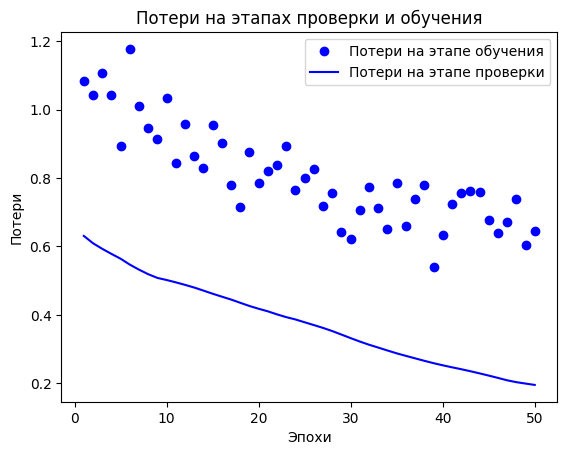

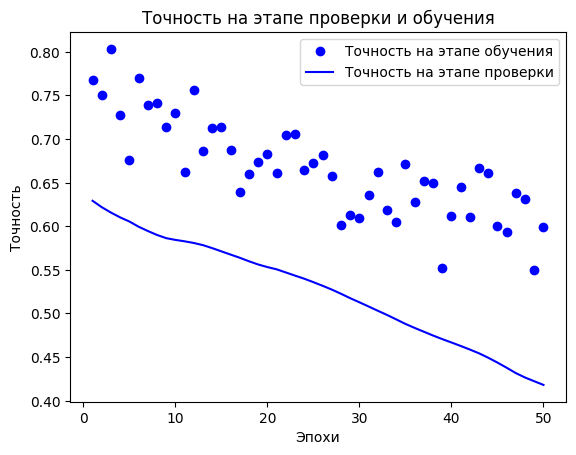


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0737 - mae: 0.7636
Точность на этапе обучения = 59.9 %
Точность на этапе проверки = 41.8 %
Точность на тестовых данных = 76.4 %


In [531]:
history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

plt.clf() # Очистить рисунок
plt.plot(epochs, history_dict['mae'], 'bo', label='Точность на этапе обучения')
plt.plot(epochs, history_dict['val_mae'], 'b', label='Точность на этапе проверки')
plt.title('Точность на этапе проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()
print()

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точность на этапе обучения = {round((history_dict['mae'][-1]*100), 1)} %")
print(f"Точность на этапе проверки = {round((history_dict['val_mae'][-1]*100), 1)} %")
print (f"Точность на тестовых данных = {round((test_accuracy*100), 1)} %")

In [532]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Best_Models/OEMZ.keras')

In [533]:
model_loaded.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 1.0737 - mae: 0.7636


[1.0737464427947998, 0.7636399865150452]

In [534]:
file_z = '/content/drive/MyDrive/test_DS.xlsx'
z_data = pd.read_excel(file_z)

In [535]:
z_data

,Data,Val_plan,Val_fact,Tovar_plan,Tovar_fact,Tovar_nesvar,Tovar_svar,Transneft,Sborka_chel,Svarka_chel
0,2023-04-01,2382.5355,2421.785,2481.033,2374.06,1365.51,1008.55,0,492.2,683.1


In [536]:
z_data = z_data[['Tovar_svar', 'Sborka_chel', 'Svarka_chel']]

In [537]:
z_data

,Tovar_svar,Sborka_chel,Svarka_chel
0,1008.55,492.2,683.1


In [538]:
z_data = z_data.apply(lambda x: (x - x.mean()) / x.std() if x.std() != 0 else x, axis=0)

In [539]:
z_data

,Tovar_svar,Sborka_chel,Svarka_chel
0,NaN,NaN,NaN


In [540]:
pred = model_loaded.predict(z_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
